In [25]:
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from datetime import date
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [26]:
import warnings
import os

In [53]:
data_file_name = os.listdir('./data')[0]
dir_path = os.getcwd()
data_path = dir_path + '/data/' + data_file_name

In [54]:
"""
    date time year-month-day hour:minute:second
    Appliances, energy use in Wh
    lights, energy use of light fixtures in the house in Wh
    T1, Temperature in kitchen area, in Celsius
    RH_1, Humidity in kitchen area, in %
    T2, Temperature in living room area, in Celsius
    RH_2, Humidity in living room area, in %
    T3, Temperature in laundry room area
    RH_3, Humidity in laundry room area, in %
    T4, Temperature in office room, in Celsius
    RH_4, Humidity in office room, in %
    T5, Temperature in bathroom, in Celsius
    RH_5, Humidity in bathroom, in %
    T6, Temperature outside the building (north side), in Celsius
    RH_6, Humidity outside the building (north side), in %
    T7, Temperature in ironing room , in Celsius
    RH_7, Humidity in ironing room, in %
    T8, Temperature in teenager room 2, in Celsius
    RH_8, Humidity in teenager room 2, in %
    T9, Temperature in parents room, in Celsius
    RH_9, Humidity in parents room, in %
    To, Temperature outside (from Chievres weather station), in Celsius
    Pressure (from Chievres weather station), in mm Hg
    RH_out, Humidity outside (from Chievres weather station), in %
    Wind speed (from Chievres weather station), in m/s
    Visibility (from Chievres weather 
    station), in km
    Tdewpoint (from Chievres weather station), Â°C
    rv1, Random variable 1, nondimensional
    rv2, Random variable 2, nondimensional
"""
raw_data = pd.read_csv(data_path)
raw_data.head(100)
raw_data = raw_data.rename(
    {
        'T1':'T_kitchen', 'RH_1':'RH_kitchen',
        'T2':'T_living', 'RH_2':'RH_living',
        'T3':'T_Laundry', 'RH_3':'RH_laundry',
        'T4':'T_office', 'RH_4':'RH_office',
        'T5':'T_bath', 'RH_5':'RH_bath',
        'T6':'T_outside', 'RH_6':'RH_outside',
        'T7':'T_ironing', 'RH_7':'RH_ironing',
        'T8':'T_teenager', 'RH_8':'RH_teenager',
        'T9':'T_parent', 'RH_9':'RH_parent'
        
    }, axis='columns')

In [31]:
raw_data.describe()

,Appliances,lights,T_kitchen,RH_kitchen,T_living,RH_living,T_Laundry,RH_laundry,T_office,RH_office,...,T_parent,RH_parent,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Room type each data gathered

### Kitchen / Living room / Laundry room / Office room / Bathroom / Outside(north side) / Ironing room / Teenager room / Parent room


In [55]:
col_date = ['date']
col_temp = ['T_kitchen', 'T_living', 'T_Laundry', 'T_office', 'T_bath', 
            'T_outside', 'T_ironing', 'T_teenager', 'T_parent']
col_hum = ['RH_kitchen','RH_living','RH_laundry','RH_office','RH_bath',
           'RH_outside','RH_ironing','RH_teenager','RH_parent']
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]

# Data exploration

In [56]:
# split data set
train, test = train_test_split(raw_data, test_size=0.25, random_state=40)

In [57]:
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms]
target_vars = train[col_target]

In [35]:
feature_vars

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,T_parent,RH_kitchen,...,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
9544,22.600,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.700000,...,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333,61.000000,20,43.195492,43.195492
19366,23.700,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.290000,...,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000,25.333333,0,46.369677,46.369677
10816,22.200,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.800000,...,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333,40.000000,20,25.722968,25.722968
15457,21.290,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.790000,...,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000,20.166667,0,3.791656,3.791656
2956,21.290,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.400000,...,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667,59.000000,10,8.706206,8.706206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,21.760,20.000000,22.000000,20.600000,20.100000,8.226667,20.200000,24.463333,20.000000,41.933333,...,38.863333,8.100000,5.200000,82.000000,754.800000,2.000000,40.000000,0,36.275509,36.275509
16065,21.200,18.000000,22.100000,20.260000,19.600000,1.730000,19.290000,22.290000,19.600000,36.433333,...,39.480000,1.750000,0.650000,92.500000,764.700000,1.000000,27.500000,0,37.879262,37.879262
14501,21.600,22.200000,22.700000,22.390000,20.000000,13.066667,21.290000,21.500000,20.290000,37.466667,...,37.900000,9.966667,4.100000,67.500000,762.616667,4.000000,27.166667,0,22.496162,22.496162
14555,23.175,22.856667,23.290000,22.890000,21.166667,18.600000,22.238571,22.823333,20.200000,37.722500,...,36.363333,17.366667,5.916667,47.500000,759.633333,4.000000,38.166667,0,32.362623,32.362623


In [36]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


# Correlation Observation

In [40]:
train_corr = train[col_temp + col_hum + col_weather + col_target + col_randoms + col_light]
corr_info = train_corr.corr()

# mask metrics
mask_met = np.zeros_like(corr, dtype=np.bool)
mask_met[np.triu_indices_from(mask_met)] = True

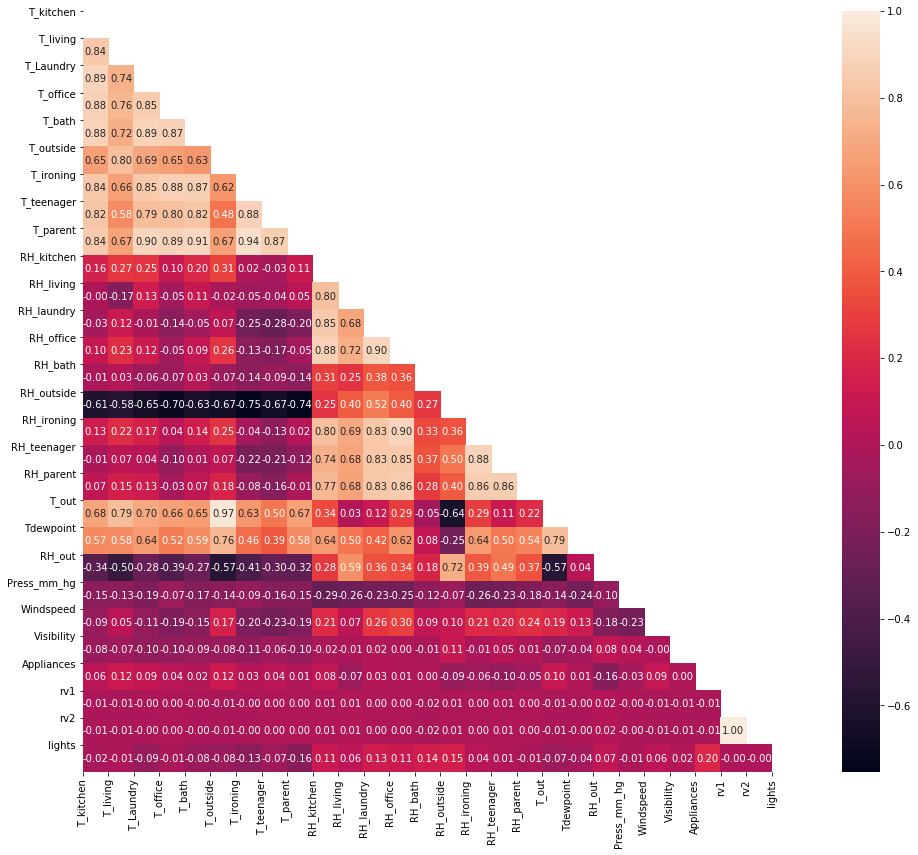

In [41]:
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_info, annot=True, fmt=".2f" , mask=mask_met,)
    #Apply xticks
plt.xticks(range(len(corr_info.columns)), corr_info.columns);
    #Apply yticks
plt.yticks(range(len(corr_info.columns)), corr_info.columns)
    #show plot
plt.show()

# Learning in Basic condition

In [58]:
X_train = train[feature_vars.columns]
y_train = train[target_vars.columns]

In [59]:
X_test = test[feature_vars.columns]
y_test = test[target_vars.columns]
X_test

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,T_parent,RH_kitchen,...,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
6314,20.600000,19.600000,20.730000,20.290000,18.100000,5.766667,19.405714,20.166667,18.212857,38.826667,...,39.712857,6.133333,-1.133333,60.333333,758.200000,2.000000,33.333333,0,12.543994,12.543994
12257,23.000000,20.963333,25.166667,21.500000,21.566667,10.225000,22.000000,24.100000,20.790000,42.890000,...,39.230000,12.016667,5.783333,65.500000,752.433333,4.000000,40.000000,10,19.339154,19.339154
6271,20.323333,18.033333,21.200000,19.790000,18.390000,-2.000000,19.000000,20.200000,18.290000,39.500000,...,44.400000,-1.250000,-1.633333,97.333333,759.966667,1.833333,37.166667,0,4.929062,4.929062
18179,23.200000,21.390000,24.200000,23.200000,21.700000,9.756000,23.468571,24.790000,22.628571,38.560000,...,37.225714,10.550000,6.133333,75.000000,760.600000,1.000000,40.000000,10,35.895013,35.895013
9661,21.700000,19.533333,21.463333,20.566667,18.500000,6.300000,19.700000,22.700000,19.600000,37.060000,...,36.590000,5.733333,3.733333,87.500000,762.200000,4.000000,57.833333,0,40.029029,40.029029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16384,22.500000,25.500000,22.533333,23.033333,20.600000,17.230000,21.157143,22.890000,20.557143,32.193333,...,37.238571,13.966667,2.766667,47.000000,766.766667,3.000000,40.000000,0,36.908701,36.908701
3757,22.050000,21.100000,21.500000,19.500000,19.194444,9.126667,18.775000,20.812222,18.790000,44.395000,...,45.626667,10.250000,5.150000,71.000000,745.983333,6.166667,40.000000,10,43.897188,43.897188
19200,24.500000,22.100000,25.890000,24.000000,23.478000,11.190000,23.434000,24.700000,22.890000,44.790000,...,45.760000,11.100000,9.000000,87.000000,759.800000,3.000000,29.000000,0,43.190387,43.190387
15776,21.500000,18.666667,22.856667,19.290000,19.100000,5.263333,19.100000,21.290000,19.100000,37.163333,...,41.260000,4.800000,4.233333,96.333333,757.400000,1.000000,40.000000,0,4.933269,4.933269


In [66]:
X_train.drop(['rv1', 'rv2', 'Visibility', 'lights'], axis=1, inplace=True)
X_test.drop(['rv1', 'rv2', 'Visibility', 'lights'], axis=1, inplace=True)

/Users/funkywoong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
X_train.head()

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,T_parent,RH_kitchen,...,RH_bath,RH_outside,RH_ironing,RH_teenager,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,22.60,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.70,...,71.263333,57.826667,26.890,38.50,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333
19366,23.70,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.29,...,37.900000,39.890000,35.090,43.40,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000
10816,22.20,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.80,...,50.026667,33.500000,37.000,43.80,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333
15457,21.29,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.79,...,59.990000,51.160000,29.700,42.95,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000
2956,21.29,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.40,...,52.175556,99.900000,51.025,57.50,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667


In [68]:
X_test.head()

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,T_parent,RH_kitchen,...,RH_bath,RH_outside,RH_ironing,RH_teenager,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
6314,20.600000,19.600000,20.730000,20.290000,18.100000,5.766667,19.405714,20.166667,18.212857,38.826667,...,49.663333,88.433333,33.290000,39.126667,39.712857,6.133333,-1.133333,60.333333,758.200000,2.000000
12257,23.000000,20.963333,25.166667,21.500000,21.566667,10.225000,22.000000,24.100000,20.790000,42.890000,...,73.196667,21.775000,33.950000,37.790000,39.230000,12.016667,5.783333,65.500000,752.433333,4.000000
6271,20.323333,18.033333,21.200000,19.790000,18.390000,-2.000000,19.000000,20.200000,18.290000,39.500000,...,58.230000,81.693333,38.900000,45.700000,44.400000,-1.250000,-1.633333,97.333333,759.966667,1.833333
18179,23.200000,21.390000,24.200000,23.200000,21.700000,9.756000,23.468571,24.790000,22.628571,38.560000,...,41.460000,12.154000,33.595714,39.400000,37.225714,10.550000,6.133333,75.000000,760.600000,1.000000
9661,21.700000,19.533333,21.463333,20.566667,18.500000,6.300000,19.700000,22.700000,19.600000,37.060000,...,45.790000,55.863333,30.166667,37.590000,36.590000,5.733333,3.733333,87.500000,762.200000,4.000000


In [69]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer

In [70]:
rnd_rgr = RandomForestRegressor()
rnd_rgr.fit(X_train, y_train)

/Users/funkywoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
metrics.r2_score(y_test, rnd_rgr.predict(X_test))

0.5859853836761402

# Model selection

In [80]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [81]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

In [82]:
# Run all the proposed models and update the information in a list model_data
model_data = []
for name, each_model in models:
    each_model_data = {}
    each_model.random_state = 78
    each_model_data["Name"] = name
    start = time.time()
    each_model.fit(X_train, y_train)
    end = time.time()
    each_model_data["Train_Time"] = end - start
    each_model_data["Test_R2_Score"] = metrics.r2_score(y_test, each_model.predict(X_test))
    model_data.append(each_model_data)

/Users/funkywoong/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

In [77]:
model_data

[{'Name': 'ExtraTreeRegressor',
  'Train_Time': 6.33944296836853,
  'Test_R2_Score': 0.6448124257819291}]

In [78]:
result = pd.DataFrame(model_data)

In [79]:
result

,Name,Train_Time,Test_R2_Score
0,ExtraTreeRegressor,6.339443,0.644812


# Parameter Tuning

In [32]:
reg = ExtraTreesRegressor(bootstrap=True, random_state=40)
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=40,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_gr

In [33]:
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=150, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [34]:
grid_search.best_estimator_.score(X_train, y_train)

0.9439825120043167